In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np

In [4]:
date_set_path = "../temp_sets/"

## Read Tempdatasets

In [5]:
# read csv file as dataframe, and drop ROW_ID column
def read_csv_no_rowid(file_path):
    df = pd.read_csv(file_path)
    low_list = [x.lower() for x in df.columns]
    df.columns = low_list
    # df.drop(['unnamed: 0', 'row_id'], axis=1, inplace=True)
    df.drop(['row_id'], axis=1, inplace=True)

    return df

In [6]:
# check NaN value

def nan_count(df):
    print("Total columns: " + str(len(df.columns)))
    print("Total rows: " + str(len(df)))
    print("--------------")
    print(df.isnull().sum())

### Chartevents

In [7]:
chartevents_sample_df = read_csv_no_rowid(date_set_path + "CHARTEVENTS_random_small_sample.csv")

In [8]:
# Drop some null value
chartevents_sample_df.dropna(subset=['subject_id', 'hadm_id', 'icustay_id'], inplace=True, axis=0)

In [9]:
chartevents_sample_df.head()

,unnamed: 0,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,53817,10694,138159,294193.0,220210,8/21/2153 10:34,NaN,NaN,27.0,27.0,insp/min,0.0,0.0,NaN,NaN
1,5723,1459,172420,212644.0,224162,11/10/2195 11:56,11/10/2195 11:57,15047.0,8.0,8.0,insp/min,0.0,0.0,NaN,NaN
2,32996,8492,118470,225777.0,220210,7/3/2117 14:00,7/3/2117 15:01,19593.0,19.0,19.0,insp/min,0.0,0.0,NaN,NaN
3,45372,10694,138159,294193.0,220293,8/14/2153 6:13,NaN,NaN,18.0,18.0,L/min,0.0,0.0,NaN,NaN
4,70221,12831,119477,295273.0,224697,9/19/2195 12:02,NaN,NaN,11.0,11.0,cmH2O,0.0,0.0,NaN,NaN


In [10]:
# Drop useless colums
chartevents_sample_df.drop(['storetime', 'cgid', 'valuenum', 'valueuom', 'warning', 'error', 'resultstatus', 'stopped'], axis=1, inplace=True)

In [11]:
nan_count(chartevents_sample_df)

Total columns: 7
Total rows: 825983
--------------
unnamed: 0       0
subject_id       0
hadm_id          0
icustay_id       0
itemid           0
charttime        0
value         5164
dtype: int64


In [12]:
nan_count(chartevents_sample_df)

Total columns: 7
Total rows: 825983
--------------
unnamed: 0       0
subject_id       0
hadm_id          0
icustay_id       0
itemid           0
charttime        0
value         5164
dtype: int64


In [13]:
chartevents_sample_df['value'].fillna(value='Na', inplace=True)

In [14]:
chartevents_sample_df.dtypes

unnamed: 0      int64
subject_id      int64
hadm_id         int64
icustay_id    float64
itemid          int64
charttime      object
value          object
dtype: object

In [15]:
# Transfer some date type
# chartevents_sample_df['subject_id'] = chartevents_sample_df['subject_id'].astype(str)
# chartevents_sample_df['hadm_id'] = chartevents_sample_df['hadm_id'].astype(str)
# chartevents_sample_df['icustay_id'] = chartevents_sample_df['icustay_id'].astype(str)

# chartevents_sample_df['itemid'] = chartevents_sample_df['itemid'].astype(str)

chartevents_sample_df['charttime'] = pd.to_datetime(chartevents_sample_df['charttime'])

In [16]:
chartevents_sample_df.dtypes

unnamed: 0             int64
subject_id             int64
hadm_id                int64
icustay_id           float64
itemid                 int64
charttime     datetime64[ns]
value                 object
dtype: object

In [17]:
len(chartevents_sample_df)

825983

##  Build Network

---

### CTGAN

In [18]:
from sdv.tabular import CTGAN
from sdv.evaluation import evaluate
from sdv.constraints import FixedCombinations

In [19]:
fixed_subject_hadm_icustay_constraint = FixedCombinations(
    column_names=['subject_id', 'hadm_id', 'icustay_id']
)

fixed_item_value_constraint = FixedCombinations(
    column_names=['itemid', 'value']
)

In [20]:
chartevents_constraints = [fixed_subject_hadm_icustay_constraint, fixed_item_value_constraint]

In [21]:
model = CTGAN(constraints=chartevents_constraints, cuda=True, verbose=True, epochs=300)

In [22]:
len(chartevents_sample_df)

825983

In [23]:
train_data = chartevents_sample_df.sample(n=1000)
model.fit(train_data)

Epoch 1, Loss G:  6.7207,Loss D: -0.0052
Epoch 2, Loss G:  6.6821,Loss D: -0.0051
Epoch 3, Loss G:  6.7013,Loss D: -0.0116
Epoch 4, Loss G:  6.6926,Loss D: -0.0040
Epoch 5, Loss G:  6.6849,Loss D: -0.0104
Epoch 6, Loss G:  6.6709,Loss D: -0.0109
Epoch 7, Loss G:  6.6973,Loss D:  0.0028
Epoch 8, Loss G:  6.6745,Loss D: -0.0055
Epoch 9, Loss G:  6.6558,Loss D: -0.0002
Epoch 10, Loss G:  6.6643,Loss D:  0.0036
Epoch 11, Loss G:  6.6735,Loss D:  0.0059
Epoch 12, Loss G:  6.6549,Loss D:  0.0148
Epoch 13, Loss G:  6.6527,Loss D:  0.0199
Epoch 14, Loss G:  6.6329,Loss D:  0.0122
Epoch 15, Loss G:  6.6575,Loss D:  0.0106
Epoch 16, Loss G:  6.6416,Loss D: -0.0002
Epoch 17, Loss G:  6.6653,Loss D: -0.0115
Epoch 18, Loss G:  6.6492,Loss D: -0.0179
Epoch 19, Loss G:  6.6576,Loss D: -0.0141
Epoch 20, Loss G:  6.6645,Loss D:  0.0032
Epoch 21, Loss G:  6.6012,Loss D:  0.0088
Epoch 22, Loss G:  6.6132,Loss D:  0.0210
Epoch 23, Loss G:  6.6032,Loss D:  0.0275
Epoch 24, Loss G:  6.6046,Loss D: -0.0032
E

In [24]:
sample = model.sample(num_rows=1000)

Sampling rows: 100%|██████████| 1000/1000 [00:00<00:00, 9288.41it/s]


In [25]:
chartevents_sample_df['value'] = chartevents_sample_df['value'].astype(str)

In [26]:
evaluate(sample, train_data, metrics=['ContinuousKLDivergence'])

0.7112779193893275

In [27]:
evaluate(sample, train_data, metrics=['DiscreteKLDivergence'])

nan

In [28]:
# evaluate(sample, chartevents_sample_df.loc[0:1000, :], aggregate=False)

<AxesSubplot:>

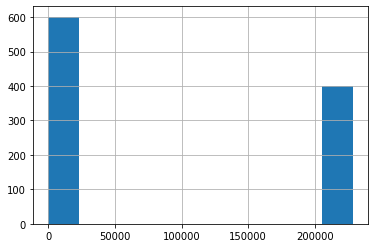

In [31]:
sample.sort_values('itemid')['itemid'].hist()

<AxesSubplot:>

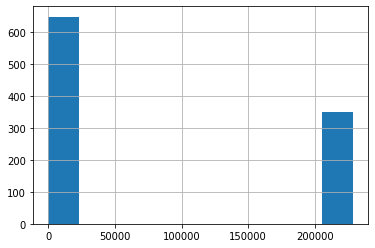

In [34]:
train_data.sort_values('itemid')['itemid'].hist()